In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
Cafe_df=pd.read_csv('/content/_cafe_sales.csv')
Cafe_df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [7]:
Cafe_df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_6170729,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [9]:
Cafe_df.dtypes


,0
Transaction ID,object
Item,object
Quantity,object
Price Per Unit,object
Total Spent,object
Payment Method,object
Location,object
Transaction Date,object


In [ ]:
# Convert to proper numeric types
Cafe_df['Quantity'] = pd.to_numeric(Cafe_df['Quantity'], errors='coerce')
Cafe_df['Price Per Unit'] = pd.to_numeric(Cafe_df['Price Per Unit'], errors='coerce')
Cafe_df['Total Spent'] = pd.to_numeric(Cafe_df['Total Spent'], errors='coerce')


In [8]:
Cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


DATA CLEANING

In [4]:
#Detect Missing values
Cafe_df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,159


Decide on strategies: drop or impute missing values.




In [12]:
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in numeric_cols:
   Cafe_df[col] = pd.to_numeric(Cafe_df[col], errors='coerce')
   print(Cafe_df[col].dtype)


float64
float64
float64


In [13]:
Cafe_df.describe()

,Quantity,Price Per Unit,Total Spent
count,9521.000000,9467.000000,9498.000000
mean,3.028463,2.949984,8.924352
std,1.419007,1.278450,6.009919
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


IMPUTING

In [15]:
#Item is a  catogorical -- using mode
Cafe_df['Item'].fillna(Cafe_df['Item'].mode()[0], inplace=True)
print(Cafe_df["Item"])



0         Coffee
1           Cake
2         Cookie
3          Salad
4         Coffee
          ...   
9995      Coffee
9996       Juice
9997      Coffee
9998      Cookie
9999    Sandwich
Name: Item, Length: 10000, dtype: object


In [16]:
Cafe_df['Item'].isnull().sum()


np.int64(0)

In [20]:
#Quantity is Numeric -- using mean
Cafe_df["Quantity"].fillna(Cafe_df["Quantity"].median(),inplace=True)
print(Cafe_df["Quantity"])

0       2.0
1       4.0
2       4.0
3       2.0
4       2.0
       ... 
9995    2.0
9996    3.0
9997    4.0
9998    3.0
9999    3.0
Name: Quantity, Length: 10000, dtype: float64


In [21]:
Cafe_df["Quantity"].isnull().sum()

np.int64(0)

In [23]:
#Price per unit is a numeric  impute using formula
Cafe_df["Price Per Unit"].fillna(Cafe_df["Price Per Unit"].median(),inplace=True)
print(Cafe_df["Price Per Unit"])

0       2.0
1       3.0
2       1.0
3       5.0
4       2.0
       ... 
9995    2.0
9996    3.0
9997    2.0
9998    3.0
9999    4.0
Name: Price Per Unit, Length: 10000, dtype: float64


<ipython-input-23-c0a5909bac2d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cafe_df["Price Per Unit"].fillna(Cafe_df["Price Per Unit"].median(),inplace=True)


In [25]:
# Total Spent is a numeric will use a formula to impute
Cafe_df['Total Spent'] = Cafe_df['Total Spent'].fillna(
    Cafe_df['Quantity'] * Cafe_df['Price Per Unit'])


In [27]:
#Payment Method is a categorical
Cafe_df['Payment Method'].fillna(Cafe_df['Payment Method'].mode()[0], inplace=True)
print(Cafe_df["Payment Method"])


0          Credit Card
1                 Cash
2          Credit Card
3              UNKNOWN
4       Digital Wallet
             ...      
9995    Digital Wallet
9996    Digital Wallet
9997    Digital Wallet
9998    Digital Wallet
9999              Cash
Name: Payment Method, Length: 10000, dtype: object


In [29]:
#Location is categorical as many values are missing but using mode to impute
Cafe_df['Location'].fillna(Cafe_df['Location'].mode()[0], inplace=True)

print(Cafe_df["Location"])


0       Takeaway
1       In-store
2       In-store
3        UNKNOWN
4       In-store
          ...   
9995     UNKNOWN
9996    Takeaway
9997    Takeaway
9998    Takeaway
9999    In-store
Name: Location, Length: 10000, dtype: object


<ipython-input-29-b0ce14cc2260>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cafe_df['Location'].fillna(Cafe_df['Location'].mode()[0], inplace=True)




Standardize Data Formats:

In [32]:
Cafe_df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Takeaway,2023-03-31
6,TXN_4433211,UNKNOWN,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,Juice,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Digital Wallet,In-store,2023-12-31


In [33]:
print(Cafe_df['Item'].unique())  # or any other column


['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' 'Juice'
 'ERROR' 'Tea']


In [34]:
#Converting into lower case and whiping off extra spaces
Cafe_df['Item'] = Cafe_df['Item'].str.lower().str.strip()


In [36]:
import numpy as np


In [37]:
Cafe_df['Item'].replace(['unknown', 'error'], np.nan, inplace=True)


<ipython-input-37-0baff332d4a1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cafe_df['Item'].replace(['unknown', 'error'], np.nan, inplace=True)


In [38]:
#Capitalizing first letter

Cafe_df['Item'] = Cafe_df['Item'].str.title()


In [39]:
print(Cafe_df['Item'].unique())


['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']


In [42]:
#for Payment Method
#Converting into lowercase and remving extra spaces
Cafe_df['Payment Method'] = Cafe_df['Payment Method'].str.lower().str.strip()

#Capitalizig the first letter
Cafe_df['Payment Method'] = Cafe_df['Payment Method'].str.title()

# change the values to nan
Cafe_df['Payment Method'].replace(['unknown', 'error'], np.nan, inplace=True)

print(Cafe_df['Payment Method'].unique())


['Credit Card' 'Cash' 'Unknown' 'Digital Wallet' 'Error']


<ipython-input-42-6cdbf3f862aa>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cafe_df['Payment Method'].replace(['unknown', 'error'], np.nan, inplace=True)


In [44]:
Cafe_df['Payment Method'].replace(['unknown', 'error'], np.nan, inplace=True)

In [45]:
print(Cafe_df['Payment Method'].unique())

['Credit Card' 'Cash' 'Unknown' 'Digital Wallet' 'Error']


In [46]:
#for Location
#Converting into lowercase and remving extra spaces
Cafe_df['Location'] = Cafe_df['Location'].str.lower().str.strip()

#Capitalizig the first letter
Cafe_df['Location'] = Cafe_df['Location'].str.title()

# change the values to nan
Cafe_df['Location'].replace(['unknown', 'error'], np.nan, inplace=True)

print(Cafe_df['Location'].unique())

['Takeaway' 'In-Store' 'Unknown' 'Error']


<ipython-input-46-50c82b954317>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cafe_df['Location'].replace(['unknown', 'error'], np.nan, inplace=True)


In [47]:
print(Cafe_df['Location'].unique())

['Takeaway' 'In-Store' 'Unknown' 'Error']


Convert date columns to datetime objects.




In [48]:
Cafe_df['Transaction Date'] = pd.to_datetime(Cafe_df['Transaction Date'], errors='coerce')


In [49]:
Cafe_df['Transaction Date'].dt.month
Cafe_df['Transaction Date'].dt.year
Cafe_df.sort_values('Transaction Date')


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8015,TXN_4801947,Juice,1.0,3.0,3.0,Digital Wallet,Takeaway,2023-01-01
9063,TXN_9161256,Smoothie,2.0,4.0,8.0,Digital Wallet,In-Store,2023-01-01
7309,TXN_6093955,Tea,5.0,1.5,7.5,Unknown,Takeaway,2023-01-01
1425,TXN_8842223,Sandwich,5.0,3.0,20.0,Digital Wallet,In-Store,2023-01-01
1777,TXN_7367474,Juice,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-01-01
...,...,...,...,...,...,...,...,...
9933,TXN_9460419,Cake,1.0,3.0,3.0,Digital Wallet,Takeaway,NaT
9937,TXN_8253472,Cake,1.0,3.0,3.0,Digital Wallet,Takeaway,NaT
9949,TXN_3130865,Juice,3.0,3.0,9.0,Digital Wallet,In-Store,NaT
9983,TXN_9226047,Smoothie,3.0,4.0,12.0,Cash,Takeaway,NaT


In [50]:
Cafe_df['Transaction Date'].dtype


dtype('<M8[ns]')

In [51]:
most_common_date = Cafe_df['Transaction Date'].mode()[0]
Cafe_df['Transaction Date'].fillna(most_common_date, inplace=True)


In [53]:
Cafe_df.tail(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9990,TXN_1538510,Coffee,5.0,2.0,10.0,Digital Wallet,Takeaway,2023-05-22
9991,TXN_3897619,Sandwich,3.0,4.0,12.0,Cash,Takeaway,2023-02-24
9992,TXN_2739140,Smoothie,4.0,4.0,16.0,Unknown,In-Store,2023-07-05
9993,TXN_4766549,Smoothie,2.0,4.0,8.0,Cash,Takeaway,2023-10-20
9994,TXN_7851634,NaN,4.0,4.0,16.0,Digital Wallet,Takeaway,2023-01-08
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Unknown,2023-08-30
9996,TXN_9659401,Juice,3.0,3.0,3.0,Digital Wallet,Takeaway,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Takeaway,2023-03-02
9998,TXN_7695629,Cookie,3.0,3.0,3.0,Digital Wallet,Takeaway,2023-12-02
9999,TXN_6170729,Sandwich,3.0,4.0,12.0,Cash,In-Store,2023-11-07


 Outlier Detection

In [54]:
# Detect Outliers: Use statistical methods like Z-score or IQR to find anomalies in sales amounts or quantities.

Q1 = Cafe_df['Quantity'].quantile(0.25)
Q3 = Cafe_df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers are values outside this range
outliers_iqr = Cafe_df[(Cafe_df['Quantity'] < lower_bound) | (Cafe_df['Quantity'] > upper_bound)]

print(outliers_iqr[['Quantity']])


Empty DataFrame
Columns: [Quantity]
Index: []


In [56]:
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

for col in numeric_cols:
    # Convert column to numeric if it's not already
    Cafe_df[col] = pd.to_numeric(Cafe_df[col], errors='coerce')

    # Calculate IQR
    Q1 = Cafe_df[col].quantile(0.25)
    Q3 = Cafe_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = Cafe_df[(Cafe_df[col] < lower_bound) | (Cafe_df[col] > upper_bound)]

    print(f"\n📊 Outliers in column '{col}':")
    print(outliers[[col]])



📊 Outliers in column 'Quantity':
Empty DataFrame
Columns: [Quantity]
Index: []

📊 Outliers in column 'Price Per Unit':
Empty DataFrame
Columns: [Price Per Unit]
Index: []

📊 Outliers in column 'Total Spent':
      Total Spent
10           25.0
51           25.0
52           25.0
96           25.0
100          25.0
...           ...
9791         25.0
9805         25.0
9879         25.0
9908         25.0
9971         25.0

[268 rows x 1 columns]


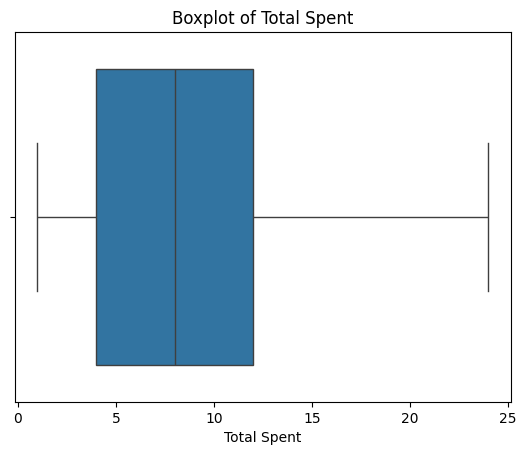

In [59]:
sns.boxplot(x=Cafe_df['Total Spent'])
plt.title("Boxplot of Total Spent")
plt.show()

Caping outliers

In [58]:
# Cap extreme values to upper and lower bounds
Cafe_df['Total Spent'] = Cafe_df['Total Spent'].clip(lower=lower_bound, upper=upper_bound)


3. Data Visualization

In [62]:
# Group by day and sum 'Total Spent'
sales_per_day = Cafe_df.groupby(Cafe_df['Transaction Date'].dt.date)['Total Spent'].sum().reset_index()


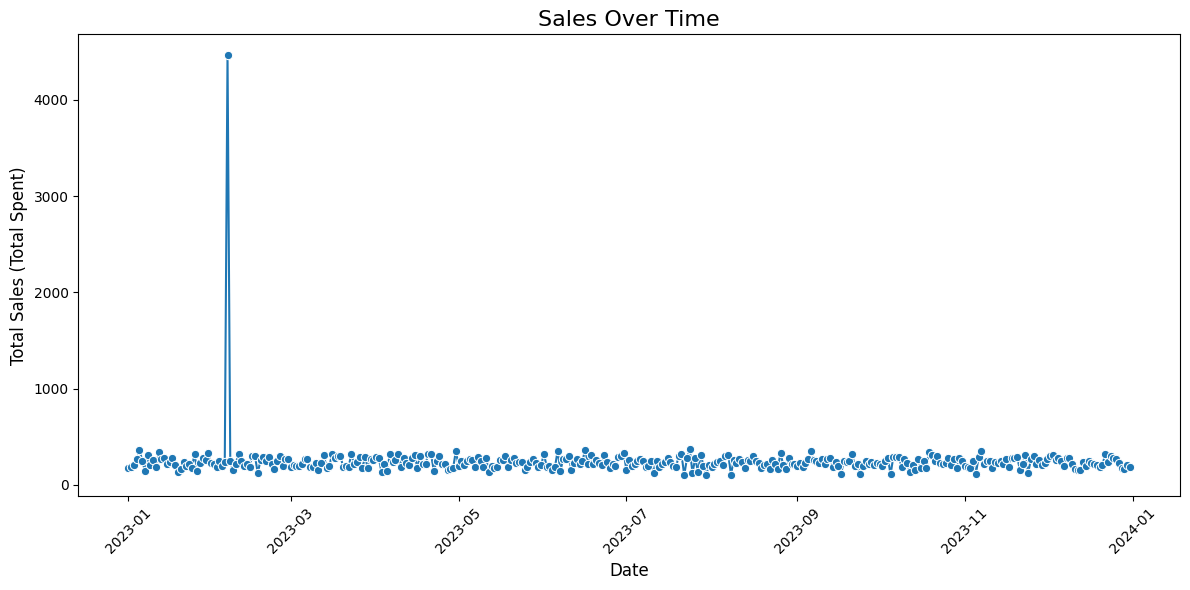

In [63]:
#Line plots showing sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Transaction Date', y='Total Spent', data=sales_per_day, marker='o')

# Adding title and labels
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (Total Spent)', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-64-b9bf05c86698>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Spent', y='Item', data=sales_by_category, palette='viridis')  # Bar plot


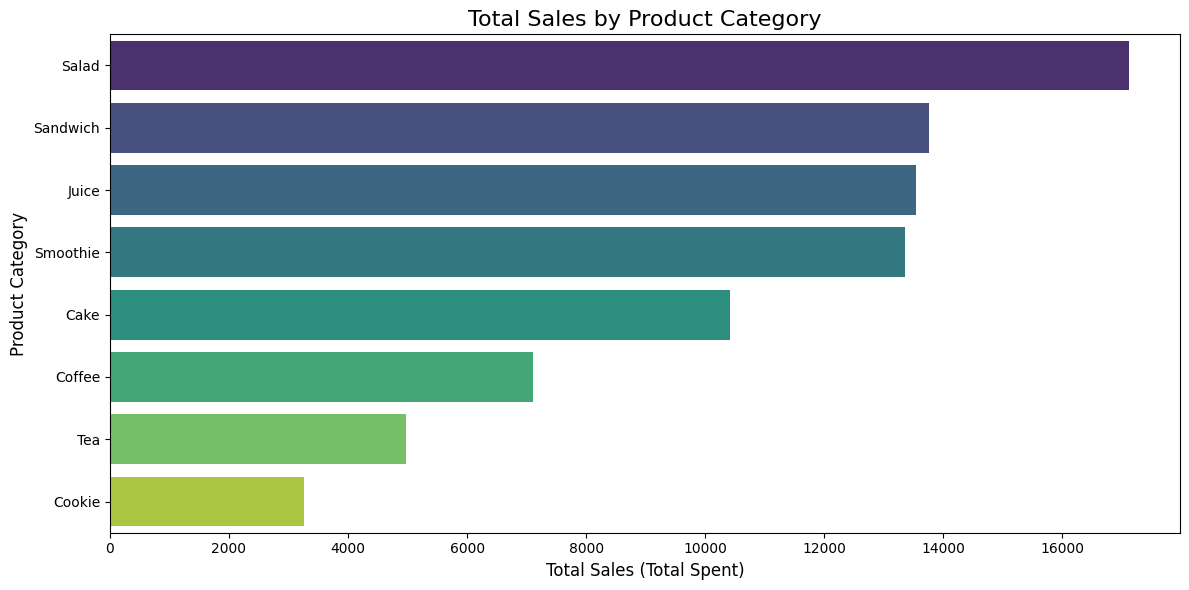

In [64]:
#Bar charts for sales by product category.
# Group by product category and calculate total sales
sales_by_category = Cafe_df.groupby('Item')['Total Spent'].sum().reset_index()

# Sort the values in descending order based on total sales
sales_by_category = sales_by_category.sort_values(by='Total Spent', ascending=False)

# Create the bar chart using seaborn
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.barplot(x='Total Spent', y='Item', data=sales_by_category, palette='viridis')  # Bar plot

# Adding title and labels
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Total Sales (Total Spent)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


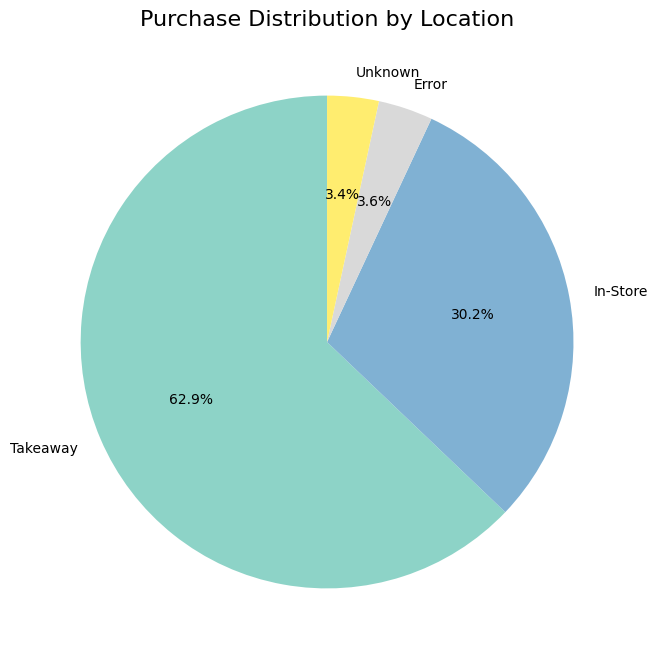

In [68]:
# Pie charts depicting purchase distribution among customer segments.
# Group by customer segment ('Location') and count the number of purchases
purchase_distribution = Cafe_df['Location'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8,8))
purchase_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Adding title
plt.title('Purchase Distribution by Location', fontsize=16)

# Display the plot
plt.ylabel('')  # Remove the ylabel
plt.show()

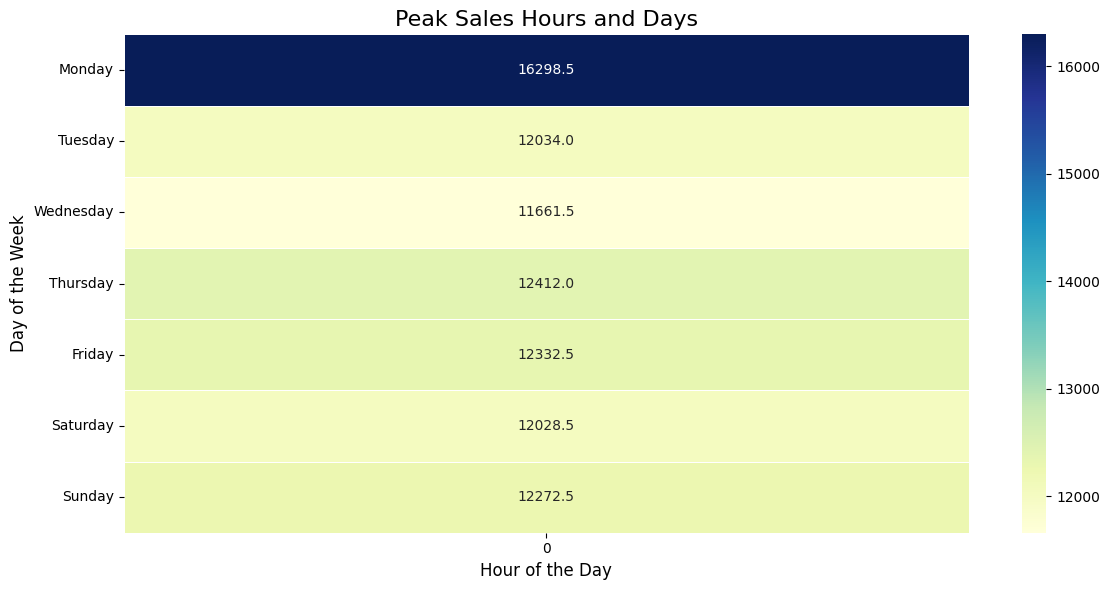

In [69]:
# Heatmaps to identify peak sales hours or days
#Extract day of the week and hour from 'Transaction Date'
Cafe_df['Day_of_Week'] = Cafe_df['Transaction Date'].dt.day_name()  # Day of the week (e.g., Monday)
Cafe_df['Hour'] = Cafe_df['Transaction Date'].dt.hour  # Hour of the day (0-23)

# Group the data by Day_of_Week and Hour, and sum the 'Total Spent'
sales_by_day_hour = Cafe_df.groupby(['Day_of_Week', 'Hour'])['Total Spent'].sum().unstack()

# Reorder the days of the week so they appear in the correct order (from Monday to Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_hour = sales_by_day_hour.loc[ordered_days]

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_by_day_hour, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)

# Adding title and labels
plt.title('Peak Sales Hours and Days', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Create New Features:

In [70]:
#Derive 'Total Sale' by multiplying quantity and unit price.

# Deriving 'Total Sale' by multiplying 'Quantity' and 'Price Per Unit'
Cafe_df['Total Sale'] = Cafe_df['Quantity'] * Cafe_df['Price Per Unit']

# Display the updated DataFrame
print(Cafe_df[['Quantity', 'Price Per Unit', 'Total Sale']].head())



   Quantity  Price Per Unit  Total Sale
0       2.0             2.0         4.0
1       4.0             3.0        12.0
2       4.0             1.0         4.0
3       2.0             5.0        10.0
4       2.0             2.0         4.0


In [71]:
# Extract 'Day of the Week' from 'Transaction Date'
Cafe_df['Day_of_Week'] = Cafe_df['Transaction Date'].dt.day_name()  # Extracts the full name of the day (e.g., 'Monday')

# Extract 'Hour' from 'Transaction Date'
Cafe_df['Hour'] = Cafe_df['Transaction Date'].dt.hour  # Extracts the hour of the day (0–23)

# Display the first few rows to check the new columns
print(Cafe_df[['Transaction Date', 'Day_of_Week', 'Hour']].head())


  Transaction Date Day_of_Week  Hour
0       2023-09-08      Friday     0
1       2023-05-16     Tuesday     0
2       2023-07-19   Wednesday     0
3       2023-04-27    Thursday     0
4       2023-06-11      Sunday     0


One-HOT-Encoding

In [72]:
# Applying One-Hot Encoding to categorical features
Cafe_df_encoded = pd.get_dummies(Cafe_df, columns=['Item', 'Location', 'Payment Method', 'Day_of_Week'], drop_first=True)

# Display the first few rows of the encoded DataFrame
print(Cafe_df_encoded.head())


  Transaction ID  Quantity  Price Per Unit  Total Spent Transaction Date  \
0    TXN_1961373       2.0             2.0          4.0       2023-09-08   
1    TXN_4977031       4.0             3.0         12.0       2023-05-16   
2    TXN_4271903       4.0             1.0          4.0       2023-07-19   
3    TXN_7034554       2.0             5.0         10.0       2023-04-27   
4    TXN_3160411       2.0             2.0          4.0       2023-06-11   

   Hour  Total Sale  Item_Coffee  Item_Cookie  Item_Juice  ...  \
0     0         4.0         True        False       False  ...   
1     0        12.0        False        False       False  ...   
2     0         4.0        False         True       False  ...   
3     0        10.0        False        False       False  ...   
4     0         4.0         True        False       False  ...   

   Payment Method_Credit Card  Payment Method_Digital Wallet  \
0                        True                          False   
1                 

 cleaned dataset



In [73]:
# Save the cleaned dataset
Cafe_df_encoded.to_csv('cleaned_data.csv', index=False)
